In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    def fit(self, x, y):
        slope = (x.mean() * y.mean() - (x * y).mean()) / (x.mean() ** 2 - (x**2).mean())
        y_intercept = np.mean(y) - slope * np.mean(x)
        self.slope = slope
        self.y_intercept = y_intercept
        return slope, y_intercept
    
    def predict(self, sample):
        return self.slope * sample + self.y_intercept
    
    def score(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)

In [3]:
x = np.array([1,2,3,4,5,6,7,8,9,10]).reshape((-1,1))
y = np.array([5, 11, 10, 12, 17, 19, 20, 23, 22, 25]).reshape((-1,1))

In [4]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

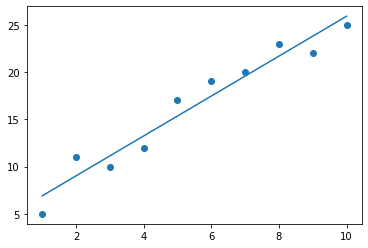

In [5]:
plt.scatter(x, y)
plt.plot(x, model.predict(x))

In [6]:
accuracy = model.score(y, y_pred)
print(f"Accuracy = {accuracy}%")

Accuracy = 0.944855350622601%


In [7]:
def r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def r2_adj(y_true, y_pred, n_predictors=1):
    r2_value = r2(y_true, y_pred)
    r2_adjusted = 1 - ( ( (1 - r2_value) * (y.shape[0] - 1) ) / (y.shape[0] - n_predictors - 1) )
    return r2_adjusted


In [8]:
r2_score = r2(y, y_pred)
r2_adjusted = r2_adj(y, y_pred, x.shape[1])
pd.DataFrame(columns=["R^2", "R^2 Adjusted"], data=np.array([np.array([r2_score, r2_adjusted])]))

,R^2,R^2 Adjusted
0,0.944855,0.937962
